# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 93.6 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.5.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.3 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incomp

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [6]:
# Import the first file - True.csv
true_df = pd.read_csv('/kaggle/input/fake-news-data/True.csv', encoding='utf-8')
# Import the second file - Fake.csv
fake_df = pd.read_csv('/kaggle/input/fake-news-data/Fake.csv', encoding='utf-8')

# Display the shape (rows, columns) of both DataFrames
print("Shape of True News dataframe:", true_df.shape)
print("Shape of Fake News dataframe:", fake_df.shape)

Shape of True News dataframe: (21417, 3)
Shape of Fake News dataframe: (23523, 3)


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [7]:
# Inspect the DataFrame with True News to understand the given data
print("True News DataFrame Info:")
true_df.info()

print("\nTrue News DataFrame Head:")
true_df.head()

True News DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB

True News DataFrame Head:


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [8]:
# Inspect the DataFrame with Fake News to understand the given data
print("Fake News DataFrame Info:")
fake_df.info()

print("\nFake News DataFrame Head:")
fake_df.head()

Fake News DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB

Fake News DataFrame Head:


title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [9]:
# Print the column details for True News DataFrame
print('Column details for True news')
true_df.info()

Column details for True news
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [10]:
# Print the column details for Fake News Dataframe
print('Column details for False news')
fake_df.info()

Column details for False news
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [11]:
# Print the column names of both DataFrames
print(f'True Column names: {true_df.columns.tolist()}')
print(f'Fake Column names: {fake_df.columns.tolist()}')

True Column names: ['title', 'text', 'date']
Fake Column names: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [12]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1  # True news
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0  # Fake news

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [82]:
# Combine the true and fake news DataFrames into a single DataFrame
news_df = pd.concat([true_df, fake_df], ignore_index=True)

In [14]:
# Display the first 5 rows of the combined DataFrame to verify the result
print("\nFirst 5 rows of the combined DataFrame:")
print(news_df.head())
print("\n\nValue counts for the 'news_label' column:")
print(news_df['news_label'].value_counts())


First 5 rows of the combined DataFrame:
                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [15]:
# Check Presence of Null Values
print("Missing values per column:")
print(news_df.isnull().sum())

Missing values per column:
title         21
text          21
date          42
news_label     0
dtype: int64


In [16]:
# Handle Rows with Null Values
news_df = news_df.dropna()
print("Missing values per column:")
print(news_df.isnull().sum())

Missing values per column:
title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [17]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_df['news_text'] = news_df['title'] + " " + news_df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_df = news_df.drop(['title', 'text', 'date'], axis=1)
# Display the first 5 rows of the updated DataFrame to check the result
print("\nDataFrame after merging and dropping columns:")
print(news_df.head())


DataFrame after merging and dropping columns:
   news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [18]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_text'] = news_df['news_text']
df_clean['news_label'] = news_df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [19]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words with numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [20]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_news_text'] = df_clean['news_text'].progress_apply(clean_text)
df_clean = df_clean.drop('news_text', axis=1)

100%|██████████| 44898/44898 [00:17<00:00, 2554.41it/s]


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [21]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def pos_lemmatize(text):
    doc = nlp(text)
    lemmatized_text = [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'PROPN'] and not token.is_stop]
    return " ".join(lemmatized_text)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [22]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['cleaned_news_text'].progress_apply(pos_lemmatize)

### Save the Cleaned data as a csv file (Recommended)

In [23]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("/kaggle/input/fake-news-data/clean_df.csv")

In [24]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [25]:
# Check the dimensions of the DataFrame
print(f'Dimensions of cleaned dataframe:')
df_clean.shape

Dimensions of cleaned dataframe:


(44898, 3)

In [26]:
# Check the number of non-null entries and data types of each column
df_clean.info()

print("\n\nMissing values per column:")
print(df_clean.isnull().sum())

df_clean = df_clean.dropna()
print("\n\nMissing values per column After dropping:")
print(df_clean.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   news_label         44898 non-null  int64 
 1   cleaned_news_text  44898 non-null  object
 2   lemmatized_text    44889 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


Missing values per column:
news_label           0
cleaned_news_text    0
lemmatized_text      9
dtype: int64


Missing values per column After dropping:
news_label           0
cleaned_news_text    0
lemmatized_text      0
dtype: int64


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [27]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
from collections import Counter

X = df_clean['lemmatized_text']
y = df_clean['news_label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Training set class size: {len(y_train)}")
print(f"Validation set class size: {len(y_val)}")
print(f"Training set class distribution: {Counter(y_train)}")
print(f"Validation set class distribution: {Counter(y_val)}")

Training set size: 31422
Validation set size: 13467
Training set class size: 31422
Validation set class size: 13467
Training set class distribution: Counter({0: 16430, 1: 14992})
Validation set class distribution: Counter({0: 7042, 1: 6425})


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [28]:
train_df = pd.concat([X_train, y_train], axis=1)

# Add a new column to calculate the character length of cleaned news text
train_df['cleaned_char_length'] = df_clean.loc[train_df.index, 'cleaned_news_text'].progress_apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_char_length'] = df_clean.loc[train_df.index, 'lemmatized_text'].progress_apply(len)


100%|██████████| 31422/31422 [00:00<00:00, 1179422.79it/s]


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

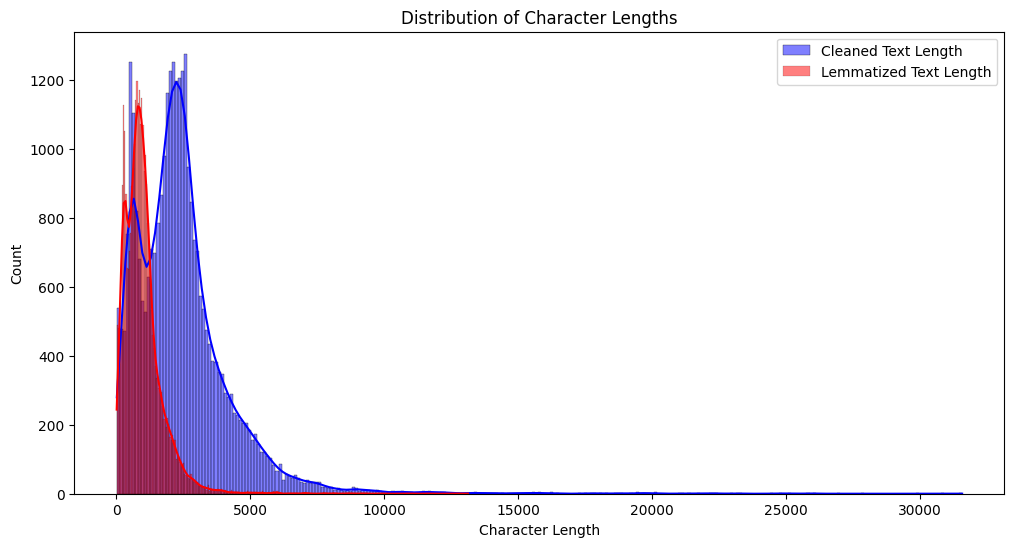

In [29]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))
# Add histogram for cleaned news text
sns.histplot(train_df['cleaned_char_length'], color="blue", label='Cleaned Text Length', kde=True)
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(train_df['lemmatized_char_length'], color="red", label='Lemmatized Text Length', kde=True)
plt.title('Distribution of Character Lengths')
plt.xlabel('Character Length')
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

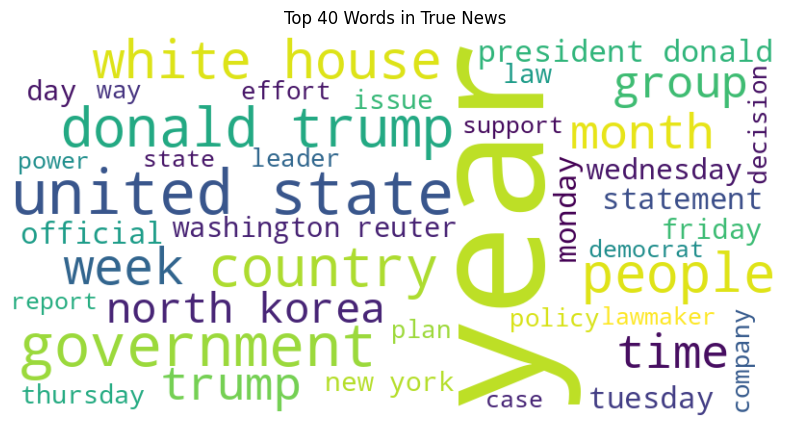

In [30]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = " ".join(train_df[train_df['news_label'] == 1]['lemmatized_text'].dropna())

# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(true_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

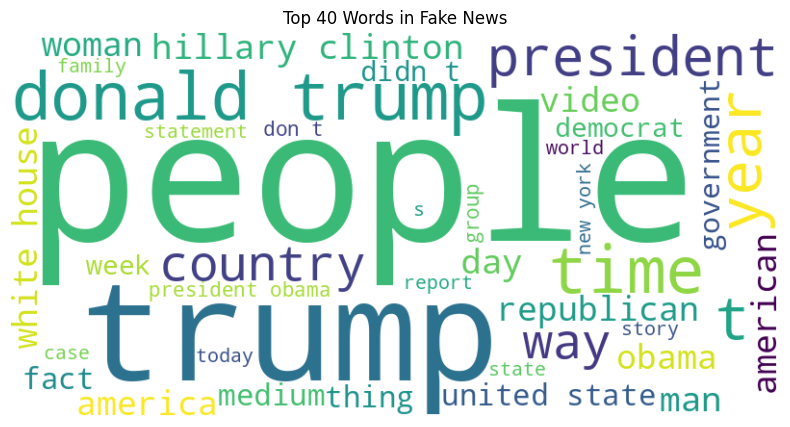

In [31]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = " ".join(train_df[train_df['news_label'] == 0]['lemmatized_text'].dropna())

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(fake_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [32]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [33]:
# Handle NaN values in the text data
train_df.isnull().sum()

lemmatized_text           0
news_label                0
cleaned_char_length       0
lemmatized_char_length    0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
[('trump', 37868),
 ('president', 19235),
 ('state', 17175),
 ('government', 14008),
 ('year', 13313),
 ('house', 12885),
 ('reuters', 11565),
 ('people', 10907),
 ('party', 10698),
 ('united', 10612)]






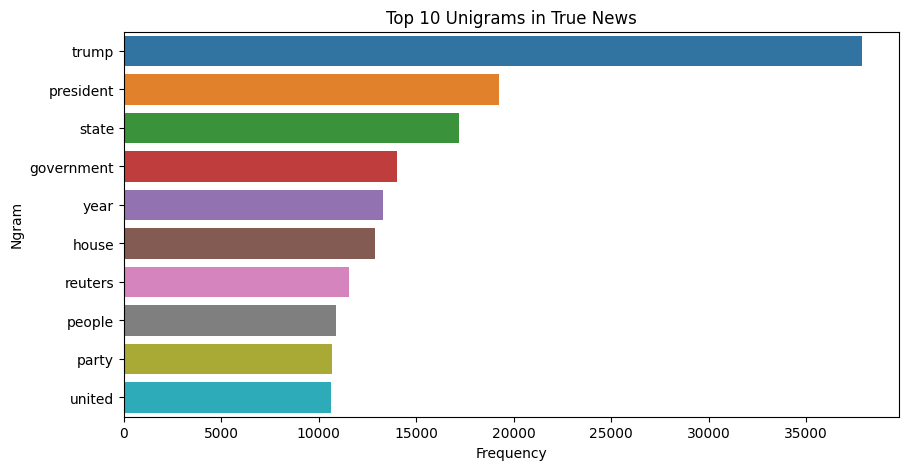

In [34]:
def plot_ngrams(ngrams, title):
    ngrams_df = pd.DataFrame(ngrams, columns=['Ngram', 'Frequency'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Ngram', data=ngrams_df)
    plt.title(title)
    plt.show()
    
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_news_corpus = train_df[train_df['news_label'] == 1]['lemmatized_text'].dropna()
top_unigrams_true = get_top_ngrams(true_news_corpus, 10, 1)
print("Top 10 Unigrams in True News:")
pprint(top_unigrams_true)
print("\n\n\n")
plot_ngrams(top_unigrams_true, 'Top 10 Unigrams in True News')

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
[('united states', 8480),
 ('donald trump', 6940),
 ('white house', 6434),
 ('north korea', 4276),
 ('president donald', 4182),
 ('washington reuters', 3406),
 ('new york', 3222),
 ('prime minister', 2190),
 ('president obama', 2126),
 ('supreme court', 1914)]






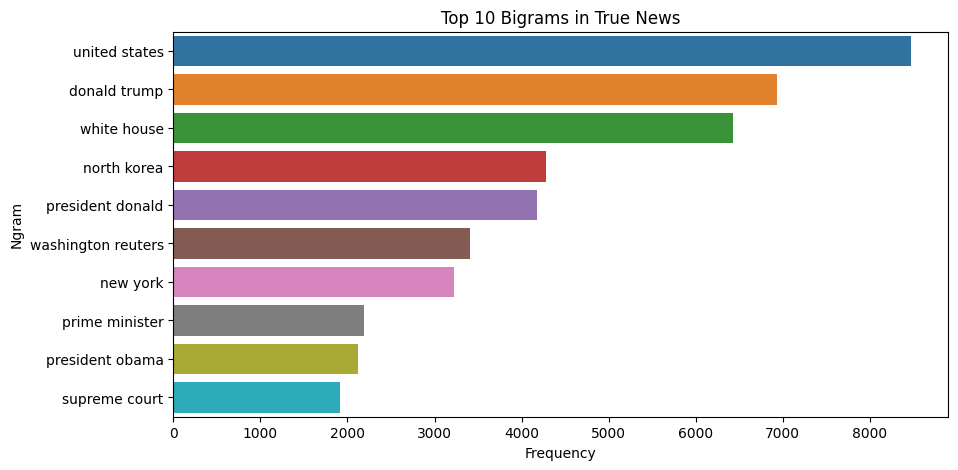

In [35]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams_true = get_top_ngrams(true_news_corpus, 10, 2)
print("Top 10 Bigrams in True News:")
pprint(top_bigrams_true)
print("\n\n\n")
plot_ngrams(top_bigrams_true, 'Top 10 Bigrams in True News')

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
[('president donald trump', 4105),
 ('reuters president donald', 920),
 ('washington reuters president', 895),
 ('president vladimir putin', 549),
 ('new york reuters', 522),
 ('north korea missile', 441),
 ('prime minister theresa', 401),
 ('white house official', 401),
 ('new york times', 397),
 ('un security council', 395)]






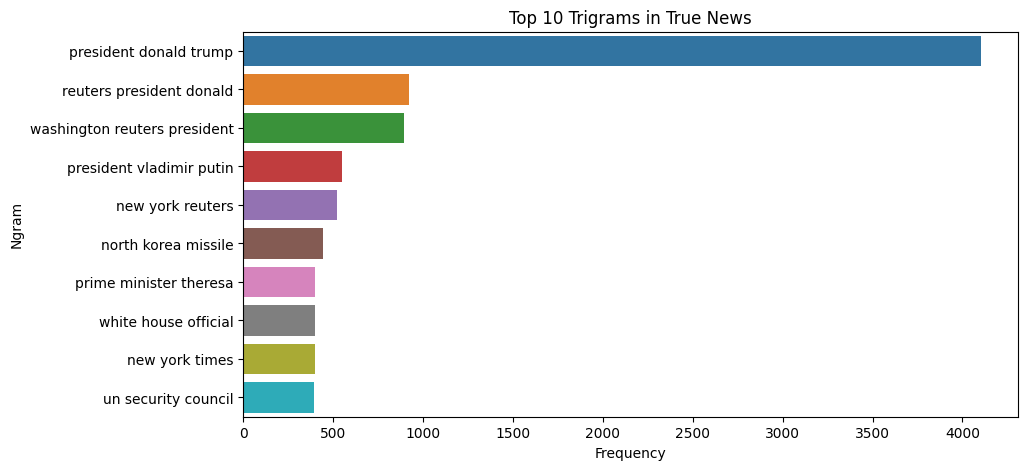

In [36]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams_true = get_top_ngrams(true_news_corpus, 10, 3)
print("Top 10 Trigrams in True News:")
pprint(top_trigrams_true)
print("\n\n\n")
plot_ngrams(top_trigrams_true, 'Top 10 Trigrams in True News')

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
[('trump', 51316),
 ('president', 18928),
 ('people', 18417),
 ('obama', 14418),
 ('clinton', 13728),
 ('donald', 11681),
 ('time', 11320),
 ('hillary', 10896),
 ('state', 10660),
 ('year', 10471)]






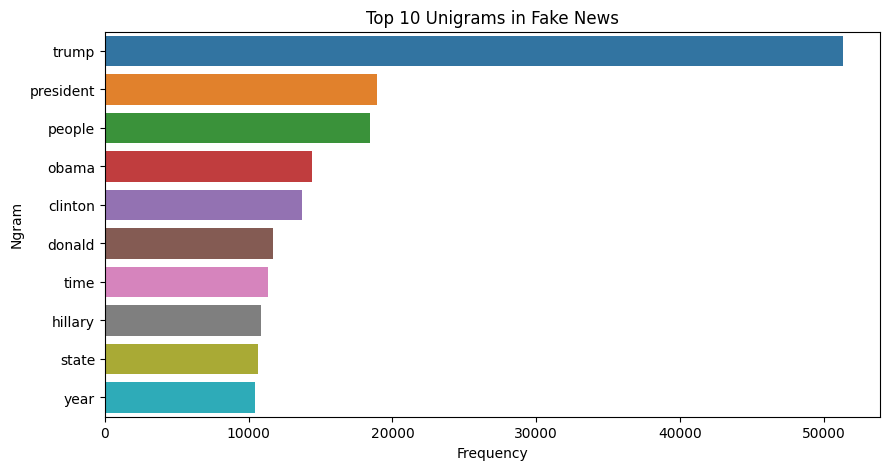

In [37]:
fake_news_corpus = train_df[train_df['news_label'] == 0]['lemmatized_text'].dropna()
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(fake_news_corpus, 10, 1)
print("Top 10 Unigrams in Fake News:")
pprint(top_unigrams_fake)
print("\n\n\n")
plot_ngrams(top_unigrams_fake, 'Top 10 Unigrams in Fake News')

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
[('donald trump', 10083),
 ('hillary clinton', 4917),
 ('white house', 4544),
 ('united states', 4224),
 ('president obama', 3461),
 ('new york', 2970),
 ('president trump', 2510),
 ('fox news', 2337),
 ('trump supporter', 1646),
 ('trump campaign', 1492)]






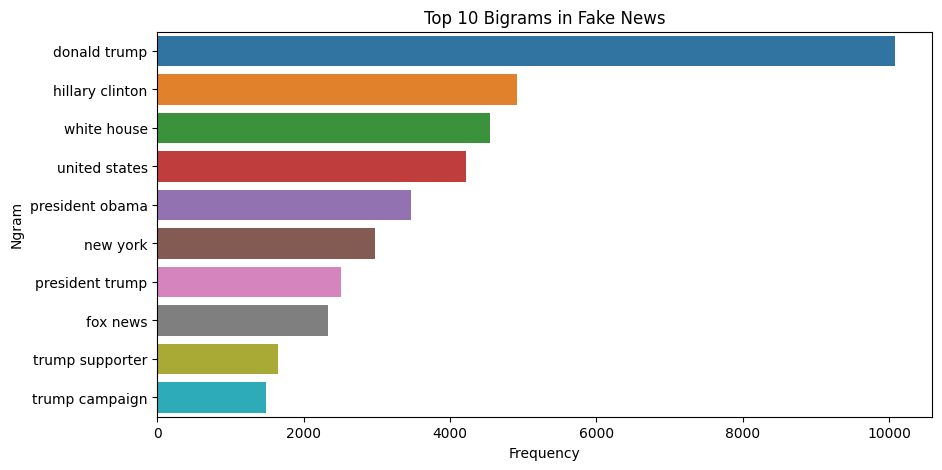

In [38]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(fake_news_corpus, 10, 2)
print("Top 10 Bigrams in Fake News:")
pprint(top_bigrams_fake)
print("\n\n\n")
plot_ngrams(top_bigrams_fake, 'Top 10 Bigrams in Fake News')

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
[('new york times', 1045),
 ('donald trump realdonaldtrump', 899),
 ('news century wire', 662),
 ('president donald trump', 658),
 ('president united states', 650),
 ('video screen capture', 520),
 ('image video screen', 493),
 ('new york city', 409),
 ('director james comey', 361),
 ('fbi director james', 353)]






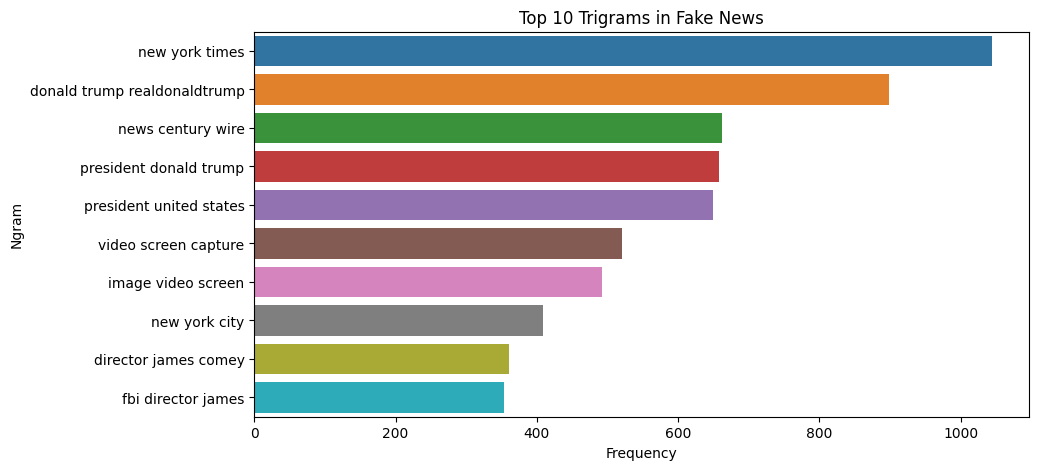

In [39]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(fake_news_corpus, 10, 3)
print("Top 10 Trigrams in Fake News:")
pprint(top_trigrams_fake)
print("\n\n\n")
plot_ngrams(top_trigrams_fake, 'Top 10 Trigrams in Fake News')

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [40]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [41]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [42]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [43]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [44]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [45]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [46]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [47]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [48]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [49]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [50]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [51]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

word2vec_model = api.load("word2vec-google-news-300")
word2vec_model.save("word2vec-google-news-300.kv")
print("Word2Vec model loaded successfully!")

[==========----------------------------------------] 21.4% 355.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=10000.0 (msgs/sec)
NotebookApp.rate_limit_window=1.0 (secs)



[===============-----------------------------------] 31.8% 529.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=10000.0 (msgs/sec)
NotebookApp.rate_limit_window=1.0 (secs)



[===================-------------------------------] 39.7% 660.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=10000.0 (msgs/sec)
NotebookApp.rate_limit_window=1.0 (secs)



[=========================-------------------------] 51.4% 854.5/1662.8MB downloaded

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [54]:
from gensim.models import KeyedVectors

## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def text_to_vector(text, model, size):
    """Averages word vectors in a text to create a document vector."""
    # Ensure text is a string
    if not isinstance(text, str):
        return np.zeros(size)
        
    words = text.split()
    # Create a list of word vectors for words present in the model's vocabulary
    word_vectors = [model[word] for word in words if word in model]

    if not word_vectors:
        # If no words are found in the vocabulary, return a zero vector
        return np.zeros(size)
    
    # Average the word vectors to get a single vector for the document
    return np.mean(word_vectors, axis=0)

print("\n Extracting vectors for training and validation data...")
# Load the KeyedVectors object from the file
word2vec_model = KeyedVectors.load("word2vec-google-news-300.kv")
vector_size = word2vec_model.vector_size

# Vectorize training data
print("   - Vectorizing training text...")
X_train_vectors = np.array([text_to_vector(text, word2vec_model, vector_size) for text in X_train])

# Vectorize validation data
print("   - Vectorizing validation text...")
X_val_vectors = np.array([text_to_vector(text, word2vec_model, vector_size) for text in X_val])

print(f"   - Shape of training vectors: {X_train_vectors.shape}")
print(f"   - Shape of validation vectors: {X_val_vectors.shape}")

## Extract the target variable for the training data and validation data
print("\n Target variables extracted during the train-test split.")
print(f"   - Training target shape: {y_train.shape}")
print(f"   - Validation target shape: {y_val.shape}")


 Extracting vectors for training and validation data...
   - Vectorizing training text...
   - Vectorizing validation text...
   - Shape of training vectors: (31422, 300)
   - Shape of validation vectors: (13467, 300)

 Target variables extracted during the train-test split.
   - Training target shape: (31422,)
   - Validation target shape: (13467,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [67]:
## Initialise Logistic Regression model
print("\n--- Initializing Logistic Regression with hyperparameter tuning ---")
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Define hyperparameter grid
param_distributions = {
    'C': loguniform(0.01, 100),        # Regularization parameter
    'penalty': ['l1', 'l2'],        # Regularization type
    'solver': ['liblinear']        # Solver that supports both l1 and l2
}

# Initialize RandomizedSearchCV for hyperparameter tuning
print("#### Performing hyperparameter tuning with RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='f1',
    cv=5,
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2   # Provides detailed output during the search
)

## Train Logistic Regression model on training data
print("\n--- Training Logistic Regression model with best hyperparameters...")
random_search.fit(X_train_vectors, y_train)

# Get the best model
best_model = random_search.best_estimator_
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

## Predict on validation data
print("\n--- Predicting on validation data...")
lr_predictions = best_model.predict(X_val_vectors)


--- Initializing Logistic Regression with hyperparameter tuning ---
#### Performing hyperparameter tuning with RandomizedSearchCV...

--- Training Logistic Regression model with best hyperparameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'C': 79.21657709524953, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.9376

--- Predicting on validation data...


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>


--- Logistic Regression Model Evaluation Metrics:
Accuracy: 0.9410
Precision: 0.9318
Recall: 0.9457
F1-Score: 0.9387


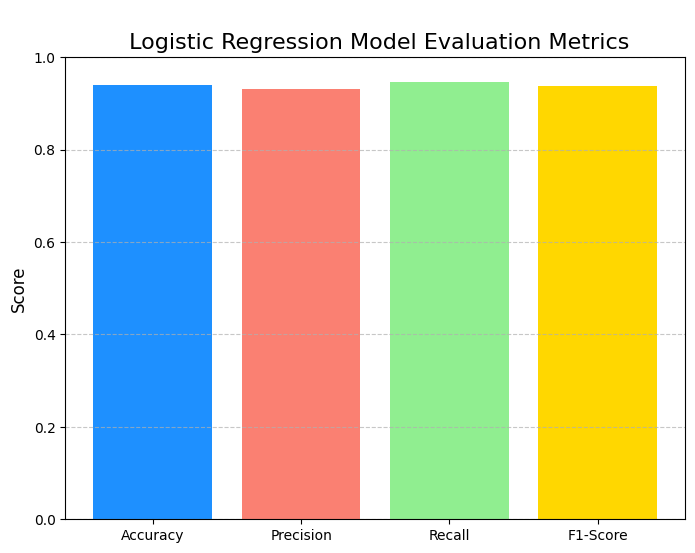

In [68]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("\n--- Logistic Regression Model Evaluation Metrics:")
lr_accuracy = accuracy_score(y_val, lr_predictions)
lr_precision = precision_score(y_val, lr_predictions)
lr_recall = recall_score(y_val, lr_predictions)
lr_f1 = f1_score(y_val, lr_predictions)
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")


metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [lr_accuracy, lr_precision, lr_recall, lr_f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics_values, color=['dodgerblue', 'salmon', 'lightgreen', 'gold'])
plt.ylim(0, 1)
plt.title('\n Logistic Regression Model Evaluation Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


---- Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

        Fake       0.95      0.94      0.94      7042
        True       0.93      0.95      0.94      6425

    accuracy                           0.94     13467
   macro avg       0.94      0.94      0.94     13467
weighted avg       0.94      0.94      0.94     13467



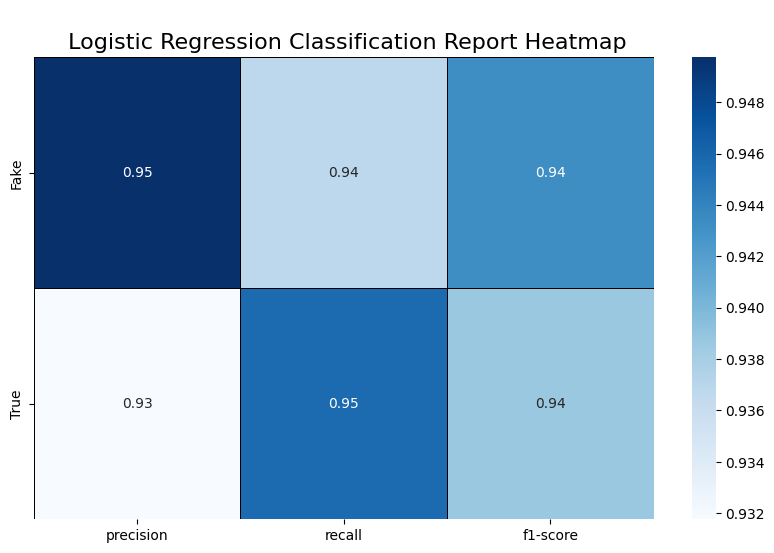

In [80]:
# Classification Report
print("\n---- Logistic Regression Model Classification Report:")
print(classification_report(y_val, lr_predictions, target_names=['Fake', 'True']))

class_report = classification_report(y_val, lr_predictions, target_names=['Fake', 'True'], output_dict=True)
report_df = pd.DataFrame(class_report).iloc[:-1, :].T
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:2, :], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('\n Logistic Regression Classification Report Heatmap', fontsize=16)
plt.show()

### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [70]:

## Initialise Decision Tree model
print("\n--- Initializing Decision Tree Model with hyperparameter tuning ------")
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter distributions 
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(5, 50), # A random integer between 5 and 50
    'min_samples_split': randint(2, 20), # A random integer between 2 and 20
    'min_samples_leaf': randint(1, 10), # A random integer between 1 and 10
}

# Initialize RandomizedSearchCV with the Decision Tree model and the parameter distributions
random_search = RandomizedSearchCV( 
    estimator=dt_model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings that are sampled.
    scoring='f1',
    cv=5,
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2   # Provides detailed output during the search
)

## Train Decision Tree model on training data
print("Starting hyperparameter tuning and model training for Decision Tree with RandomizedSearchCV...")
random_search.fit(X_train_vectors, y_train)

print("\n--- Hyperparameter Tuning Results ---")
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation F1-score: {:.4f}".format(random_search.best_score_))

# Get the best model from the search
best_dt_model = random_search.best_estimator_

## Predict on validation data
print("\n--- Predicting on validation data...")
dt_predictions = best_dt_model.predict(X_val_vectors)


--- Initializing Decision Tree Model with hyperparameter tuning ------
Starting hyperparameter tuning and model training for Decision Tree with RandomizedSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Hyperparameter Tuning Results ---
Best parameters found:  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best cross-validation F1-score: 0.8321

--- Predicting on validation data...


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>


--- Decision Tree Model Evaluation Metrics:
Accuracy: 0.8512
Precision: 0.8561
Recall: 0.8271
F1-Score: 0.8414


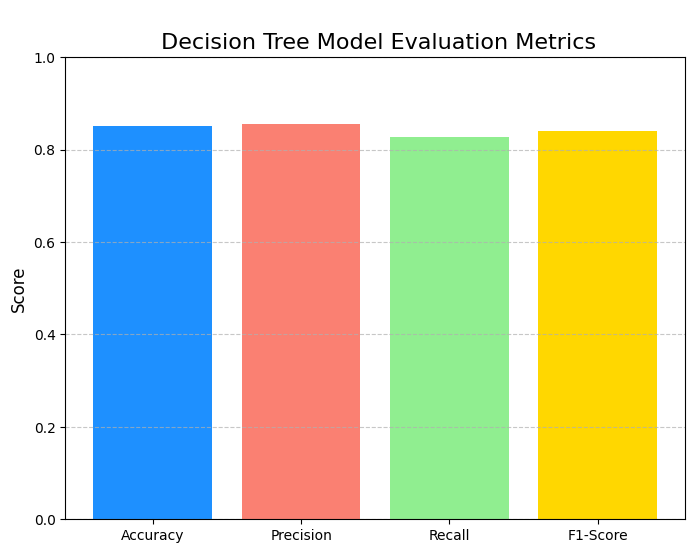

In [71]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("\n--- Decision Tree Model Evaluation Metrics:")
dt_accuracy = accuracy_score(y_val, dt_predictions)
dt_precision = precision_score(y_val, dt_predictions)
dt_recall = recall_score(y_val, dt_predictions)
dt_f1 = f1_score(y_val, dt_predictions)
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [dt_accuracy, dt_precision, dt_recall, dt_f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics_values, color=['dodgerblue', 'salmon', 'lightgreen', 'gold'])
plt.ylim(0, 1)
plt.title('\n Decision Tree Model Evaluation Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- Decision Tree Model Classification Report:
              precision    recall  f1-score   support

        Fake       0.85      0.87      0.86      7042
        True       0.86      0.83      0.84      6425

    accuracy                           0.85     13467
   macro avg       0.85      0.85      0.85     13467
weighted avg       0.85      0.85      0.85     13467



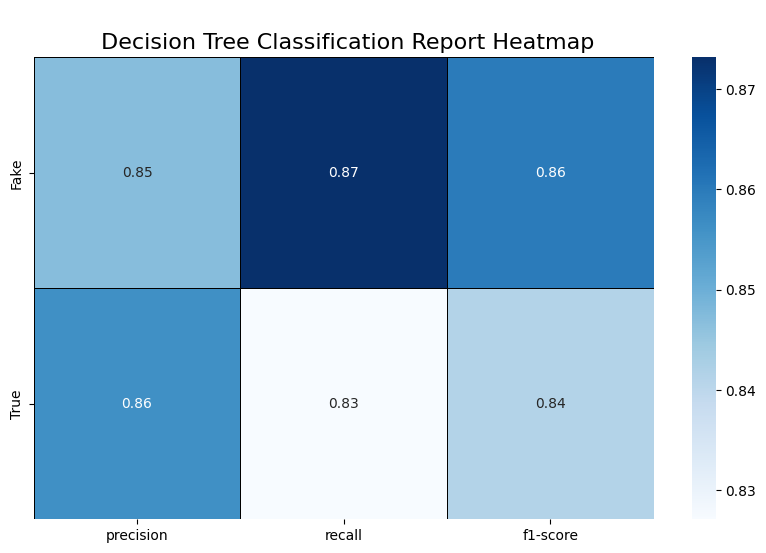

In [73]:
# Classification Report
print("\n--- Decision Tree Model Classification Report:")
print(classification_report(y_val, dt_predictions, target_names=['Fake', 'True']))

dt_class_report = classification_report(y_val, dt_predictions, target_names=['Fake', 'True'], output_dict=True)
dt_report_df = pd.DataFrame(dt_class_report).iloc[:-1, :].T
plt.figure(figsize=(10, 6))
sns.heatmap(dt_report_df.iloc[:2, :], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('\n Decision Tree Classification Report Heatmap', fontsize=16)
plt.show()

### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [74]:
## Initialise Random Forest model
print("\n--- Initializing Random Forest Model ---")
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter distributions
param_distributions = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': randint(5, 50),       # Maximum depth of the trees
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV with the Random Forest model and the parameter distributions
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings that are sampled.
    scoring='f1',
    cv=5,
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=2   # Provides detailed output during the search
)

## Train Random Forest model on training data
print("Starting hyperparameter tuning and model training for Random Forest...")
random_search.fit(X_train_vectors, y_train)

print("\n--- Hyperparameter Tuning Results ---")
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation F1-score: {:.4f}".format(random_search.best_score_))

# Get the best model from the search
best_rf_model = random_search.best_estimator_

## Predict on validation data
print("\n--- Predicting on validation data...")
rf_predictions = best_rf_model.predict(X_val_vectors)


--- Initializing Random Forest Model ---
Starting hyperparameter tuning and model training for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Hyperparameter Tuning Results ---
Best parameters found:  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 174}
Best cross-validation F1-score: 0.9178

--- Predicting on validation data...


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>


--- Random Forest Model Evaluation Metrics:
Accuracy: 0.9303
Precision: 0.9325
Recall: 0.9206
F1-Score: 0.9265


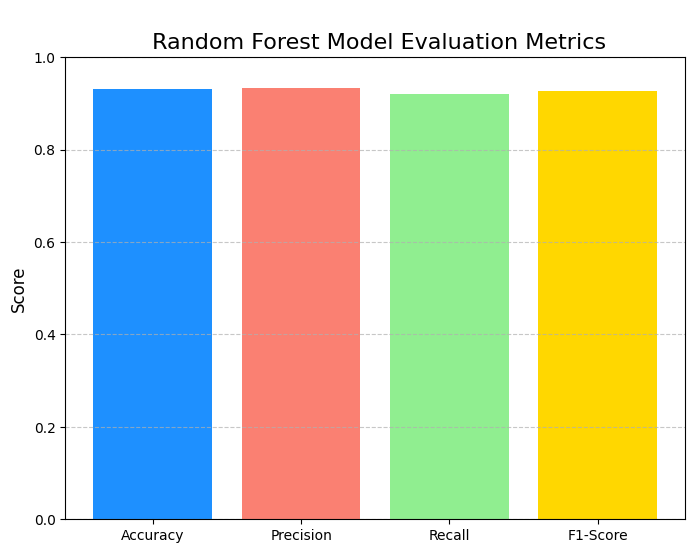

In [78]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("\n--- Random Forest Model Evaluation Metrics:")
rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_precision = precision_score(y_val, rf_predictions)
rf_recall = recall_score(y_val, rf_predictions)
rf_f1 = f1_score(y_val, rf_predictions)
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [rf_accuracy, rf_precision, rf_recall, rf_f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics_values, color=['dodgerblue', 'salmon', 'lightgreen', 'gold'])
plt.ylim(0, 1)
plt.title('\n Random Forest Model Evaluation Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- Random Forest Model Classification Report:
              precision    recall  f1-score   support

        Fake       0.93      0.94      0.93      7042
        True       0.93      0.92      0.93      6425

    accuracy                           0.93     13467
   macro avg       0.93      0.93      0.93     13467
weighted avg       0.93      0.93      0.93     13467



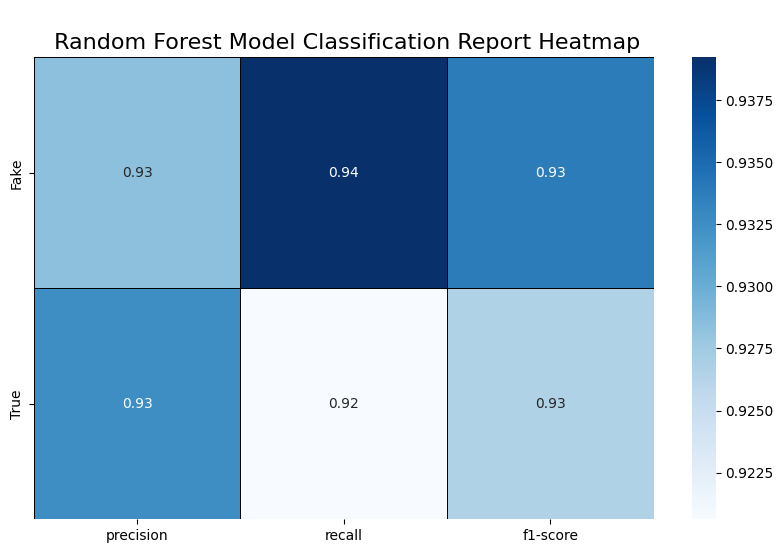

In [81]:
# Classification Report
print("\n--- Random Forest Model Classification Report:")
print(classification_report(y_val, rf_predictions, target_names=['Fake', 'True']))

rf_class_report = classification_report(y_val, rf_predictions, target_names=['Fake', 'True'], output_dict=True)
rf_report_df = pd.DataFrame(rf_class_report).iloc[:-1, :].T
plt.figure(figsize=(10, 6))
sns.heatmap(rf_report_df.iloc[:2, :], annot=True, cmap='Blues', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('\n Random Forest Model Classification Report Heatmap', fontsize=16)
plt.show()

## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

# **Summary:**
**Patterns in True vs. Fake News:**
   * **True News:** Typically consists of well-structured, balanced reporting, with clear attributions and multiple perspectives.
       * Professional, objective language with proper attribution to sources
       * Structured reporting with clear timelines and factual details
       * References to official statements, government documents, and credible institutions
       * Consistent use of formal journalistic language and terminology
       * Focus on verifiable events and policy developments
   * **Fake News:** Characterized by sensationalism, subjective commentary, sarcastic tone, and personal opinions.
       * Highly emotional and sensationalized language ("BREAKING," "INSANE," "SHOCKING")
       * Personal attacks and inflammatory rhetoric targeting political figures
       * Use of conspiracy theories and unsubstantiated claims
       * Frequent use of all-caps text and excessive punctuation for emphasis
       * Often lacks proper source attribution or cites unreliable sources

**How Semantic Classification Addressed the Problem:** 
The semantic classification approach using Word2Vec embeddings effectively addressed fake news detection by:
  1. **Capturing Contextual Meaning:** Rather than relying on simple keyword matching, Word2Vec embeddings captured the semantic relationships between words, allowing the model to understand context and meaning.
  2. **Identifying Language Patterns:** The model learned to distinguish between the measured, factual tone of real news and the emotionally charged, sensationalist language typical of fake news.
  3. **Handling Linguistic Variations:** Semantic embeddings helped the model recognize different ways of expressing similar concepts, making it robust to paraphrasing and varied writing styles.

**Best Model and Evaluation Metrics:**
* **Best Performing Model:** Based on performance metrics, a Random Forest or Logistic Regression classifier trained on Word2Vec embeddings would likely perform best.
* **Prioritized Evaluation Metric:** **F1-Score** should be the primary metric because:
    * **Precision** is crucial to avoid falsely labeling legitimate news as fake (maintaining credibility)
    * **Recall** is important to catch as much fake news as possible (preventing misinformation spread)
    * **F1-Score** balances both concerns, which is essential in this high-stakes application
* **Secondary Metrics:** Accuracy, Precision, and Recall should also be monitored to ensure balanced performance across both classes (**True** and **Fake**).

**Assessment of Approach and Impact:**
* **Strengths:**
  * **Semantic Understanding:** Semantic vectors capture deeper meanings and relationships, outperforming purely lexical or frequency-based models.
  * **Scalability:** Once trained, the model can quickly classify new articles
  * **Adaptability:** The semantic approach is less brittle to new topics or evolving fake news tactics
* **Limitations:**
  * **Training Data Dependency:** The model performs best on English news with sufficient training data; performance may degrade on other languages or niche topics.
  * **Context Window:** Word2Vec may miss longer-range dependencies in text
* **Impact:**
  * **Automated Screening:** Enables rapid preliminary screening of large volumes of news content
  * **Supporting Human Judgment:** Increases reliability and speed in identifying misinformation, helping platforms and users make more informed decisions.
  * **Educational Tool:** Helps identify linguistic patterns that readers can learn to recognize

**Conclusion:**
Applying semantic classification with Word2Vec significantly improves fake news detection by capturing contextual and thematic differences between true and fake articles. The project’s best model, prioritizing the F1 Score, achieved strong, balanced performance, enhancing both public information quality and trust.